                                                    TELECOM CHURN PREDICTION

OBJECTIVE : 
        
        To build a machine learning model for predicting customer churn. This involves stages of exploratory data analysis, data cleaning, visualization, feature engineering, model development, API creation, and deployment. The aim is to improve customer retention and business outcomes.

ABOUT THE DATASET :

1. **gender**:
   - This column represents the gender of a person. It has two possible values: "Female" and "Male".

2. **SeniorCitizen**:
   - This column indicates whether the person is a senior citizen. It has two unique values: 0 for non-senior citizens and 1 for senior citizens.

3. **Partner**:
   - This column specifies whether the person has a partner. It contains two values: "Yes" if the person has a partner and "No" otherwise.

4. **Dependents**:
   - This column indicates whether the person has dependents. The unique values are "Yes" if they have dependents and "No" otherwise.

5. **PhoneService**:
   - This column reflects whether the person has phone service. The values are "Yes" and "No".

6. **MultipleLines**:
   - This column indicates whether the person has multiple phone lines. The values are "No phone service", "No", and "Yes".

7. **InternetService**:
   - This column represents the type of internet service the person has. The unique values are "DSL", "Fiber optic", and "No".

8. **OnlineSecurity**:
   - This column indicates whether the person has online security services. The unique values are "No", "Yes", and "No internet service".

9. **OnlineBackup**:
   - This column indicates whether the person has online backup services. It has three unique values: "Yes", "No", and "No internet service".

10. **DeviceProtection**:
    - This column indicates whether the person has device protection services. The possible values are "No", "Yes", and "No internet service".

11. **TechSupport**:
    - This column indicates whether the person has technical support services. The unique values are "No", "Yes", and "No internet service".

12. **StreamingTV**:
    - This column indicates whether the person has streaming TV services. The unique values are "No", "Yes", and "No internet service".

13. **StreamingMovies**:
    - This column indicates whether the person has streaming movie services. The values are "No", "Yes", and "No internet service".

14. **Contract**:
    - This column represents the type of contract the person has. The unique values are "Month-to-month", "One year", and "Two year".

15. **PaperlessBilling**:
    - This column indicates whether the person has paperless billing. The values are "Yes" and "No".

16. **PaymentMethod**:
    - This column represents the method used for payment. The unique values are "Electronic check", "Mailed check", "Bank transfer (automatic)", and "Credit card (automatic)".

17. **MonthlyCharges**:
    - This column indicates the monthly charges for the service. It has a range of numerical values representing the monthly cost.

18. **TotalCharges**:
    - This column represents the total charges accrued over time. It has a range of numerical values representing the total cost over the person's tenure.

19. **Churn**:
    - This column indicates whether the person has churned, i.e., discontinued the service. It has two values: 0 for no churn and 1 for churn.


In [193]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

pd.pandas.set_option('display.max_columns' , None)

In [194]:
#reading the dataset 

df_base = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_base

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [195]:
#checking the number of rows and columns of the dataset 

df_base.shape

(7043, 21)

In [196]:
df_base.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [197]:
#checking the datatypes
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [198]:
df_base.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Here we can see that 75% customers have tenure less than 5 months .

Average monnthly charges is USD 64.76 whereas 25% customers pay more than 89.5 USD per month .

Text(0, 0.5, 'Target variable')

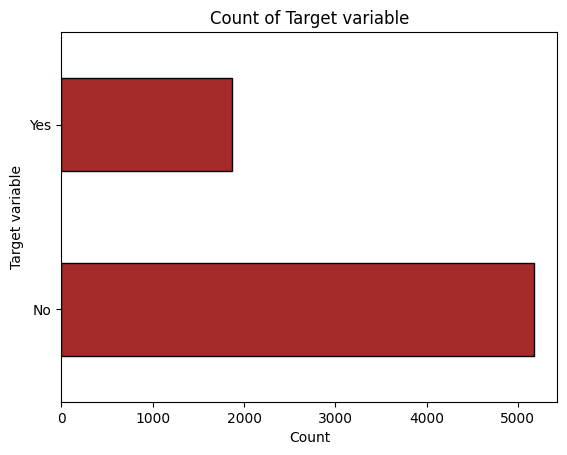

In [199]:
df_base['Churn'].value_counts().plot(kind = 'barh' , color = 'brown' , edgecolor = 'black')
plt.title('Count of Target variable')
plt.xlabel('Count')
plt.ylabel('Target variable')

In [200]:
#calculating the percentage of the target variable distribution 

((df_base['Churn'].value_counts()) / len(df_base)) * 100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

>> Checking for missing values :

In [201]:
def missing_values(df_base):
    
    total = df_base.isnull().sum().sort_values(ascending = False)
    percent = (total / len(df_base)) * 100 
    return pd.concat((total , percent) , axis = 1 , keys = ['TOTAL' , 'PERCENT'])

miss_values = missing_values(df_base)
miss_values

,TOTAL,PERCENT
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


HERE WE HAVE NO MISSING VALUES

                                                DATA CLEANING & EDA 

1. Create a copy of base data for manipulation & processing

In [202]:
df = df_base.copy()

2. Fixing datatype of total charges column to numeric

In [203]:
df.TotalCharges = pd.to_numeric(df.TotalCharges , errors = 'coerce')
missing_values(df)

,TOTAL,PERCENT
TotalCharges,11,0.156183
customerID,0,0.000000
DeviceProtection,0,0.000000
MonthlyCharges,0,0.000000
PaymentMethod,0,0.000000
PaperlessBilling,0,0.000000
Contract,0,0.000000
StreamingMovies,0,0.000000
StreamingTV,0,0.000000
TechSupport,0,0.000000


3. As we can see 11 missing values now & since the percentage of missing values is 0.15% . it is safe to ignore them for further processing . 

In [204]:
df.dropna(inplace = True)

4. Divide the customers based on tenure . Ex - for tenure < 12 months : assign a tenure group of 1-12 and so on . 

In [205]:
#get the maximum & minimum tenure

print(df['tenure'].min())
print(df['tenure'].max())

1
72


In [206]:
#group the tenure in bins of 12 months 

labels = ["{0} - {1}".format( i , i+11) for i in range(1, 72 , 12)]
df['tenure_group'] = pd.cut(df.tenure , range( 1, 80 , 12) , right = False , labels = labels)

This line of code is creating a list of labels for each bin. 
The range(1, 72, 12) function generates numbers starting from 1 up to 72 (exclusive) with a step of 12. So, it generates [1, 13, 25, 37, 49, 61]. 
For each of these numbers i, it creates a string in the format i - (i+11). 
So, the labels list will look like this: ['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72'].

This line of code is creating a new column in the telco_data DataFrame called tenure_group. The pd.cut() function is used to separate the range of tenure into bins. The range(1, 80, 12) function defines the bins to be from 1 to 80 with a step of 12. So, it generates [1, 13, 25, 37, 49, 61, 73]. The right=False parameter means that the bins include the left value but exclude the right value. The labels=labels parameter assigns the previously created labels to these bins.

So, if a tenure value is between 1 and 12 (inclusive of 1 but exclusive of 12), it gets labeled as ‘1 - 12’. If it’s between 13 and 24 (inclusive of 13 but exclusive of 24), it gets labeled as ‘13 - 24’, and so on. This way, the tenure data gets categorized into different tenure_group

In [207]:
df.tenure_group.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

5. Removing unncessary columns

In [208]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12


In [209]:
df.drop(columns = ['customerID' , 'tenure'] , axis = 1 , inplace = True)
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12


                                                    DATA EXPLORATION & ENCODING

Displaying all the columns with its unique values.

In [210]:
def displayunique(df):
    for column in df.columns:
        print(f"Column Name: {column}")
        print(f"Unique Values: {df[column].unique()}\n")
        
displayunique(df)

Column Name: gender
Unique Values: ['Female' 'Male']

Column Name: SeniorCitizen
Unique Values: [0 1]

Column Name: Partner
Unique Values: ['Yes' 'No']

Column Name: Dependents
Unique Values: ['No' 'Yes']

Column Name: PhoneService
Unique Values: ['No' 'Yes']

Column Name: MultipleLines
Unique Values: ['No phone service' 'No' 'Yes']

Column Name: InternetService
Unique Values: ['DSL' 'Fiber optic' 'No']

Column Name: OnlineSecurity
Unique Values: ['No' 'Yes' 'No internet service']

Column Name: OnlineBackup
Unique Values: ['Yes' 'No' 'No internet service']

Column Name: DeviceProtection
Unique Values: ['No' 'Yes' 'No internet service']

Column Name: TechSupport
Unique Values: ['No' 'Yes' 'No internet service']

Column Name: StreamingTV
Unique Values: ['No' 'Yes' 'No internet service']

Column Name: StreamingMovies
Unique Values: ['No' 'Yes' 'No internet service']

Column Name: Contract
Unique Values: ['Month-to-month' 'One year' 'Two year']

Column Name: PaperlessBilling
Unique Values:

>> UNIVARIATE ANALYSIS

1. Plot distribution of individual predictors by churn

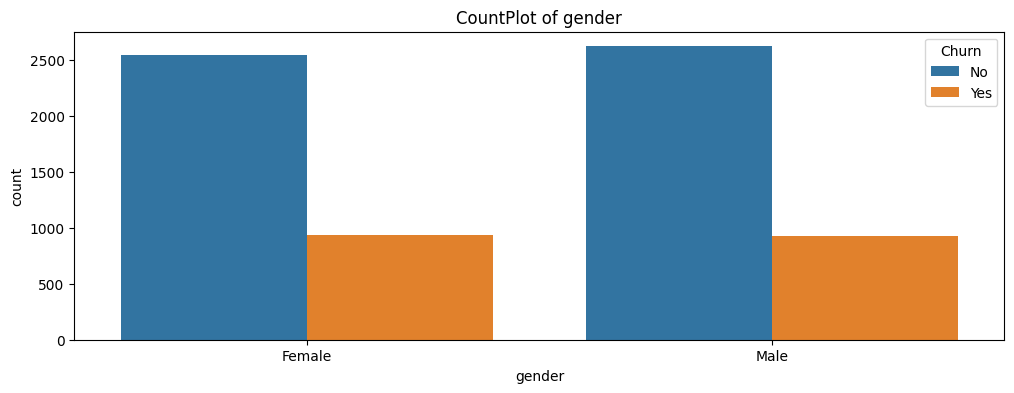

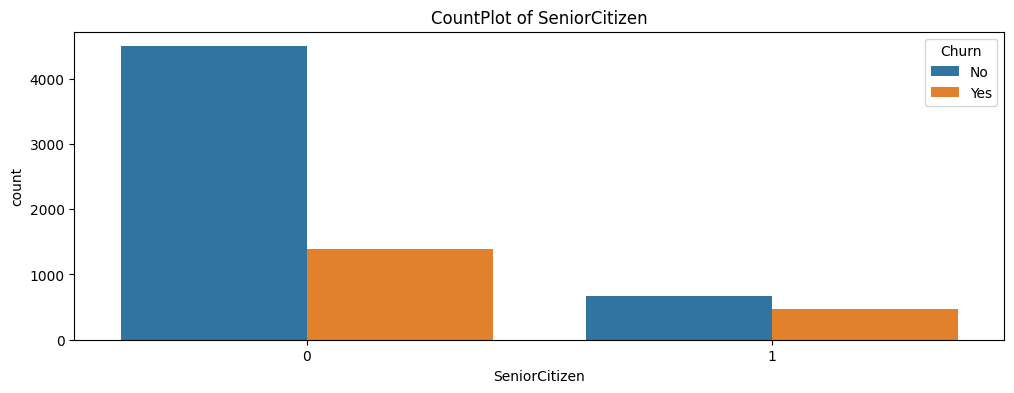

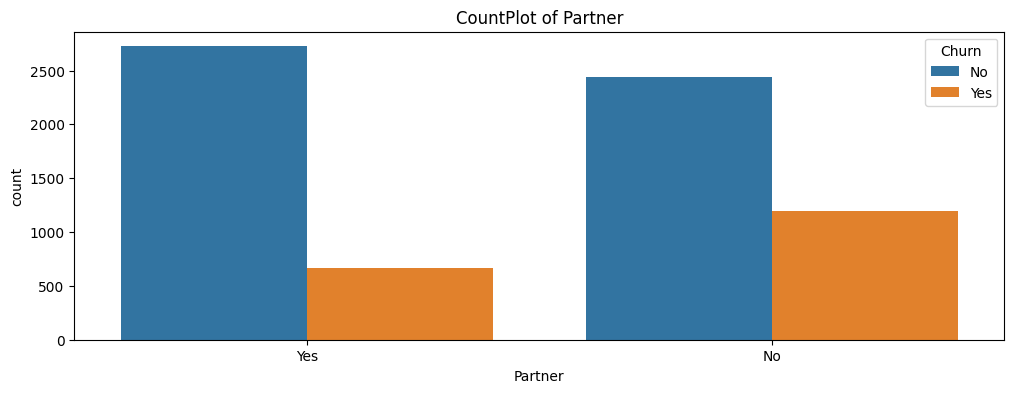

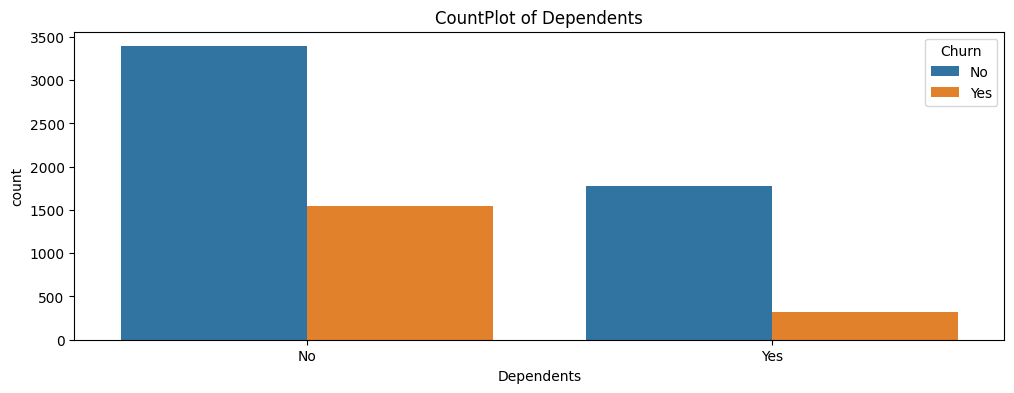

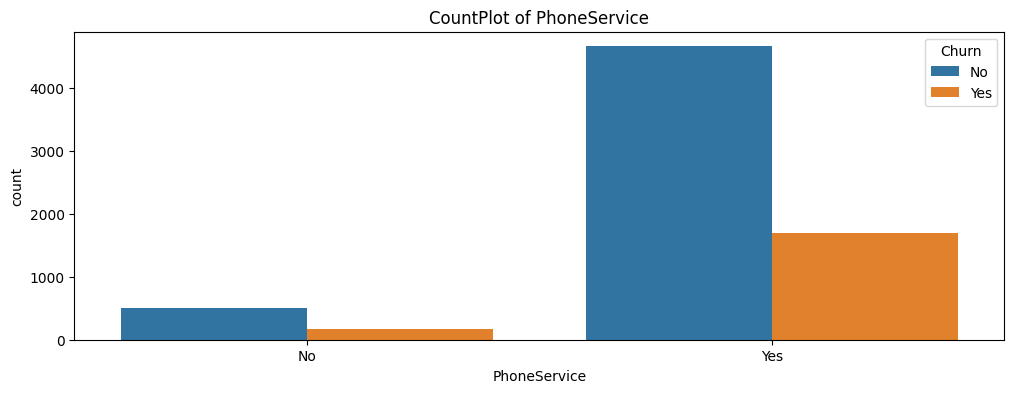

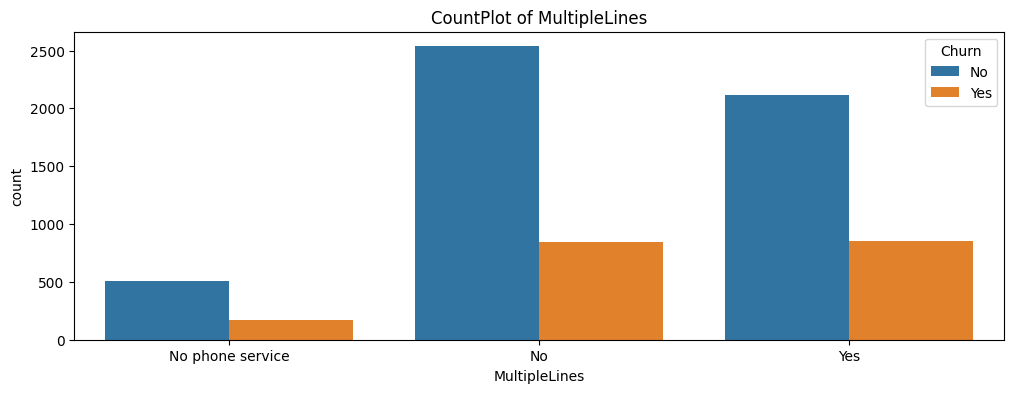

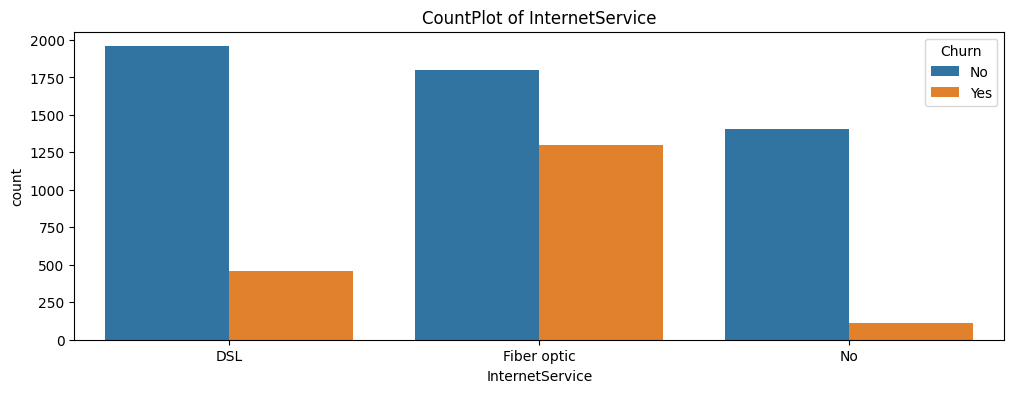

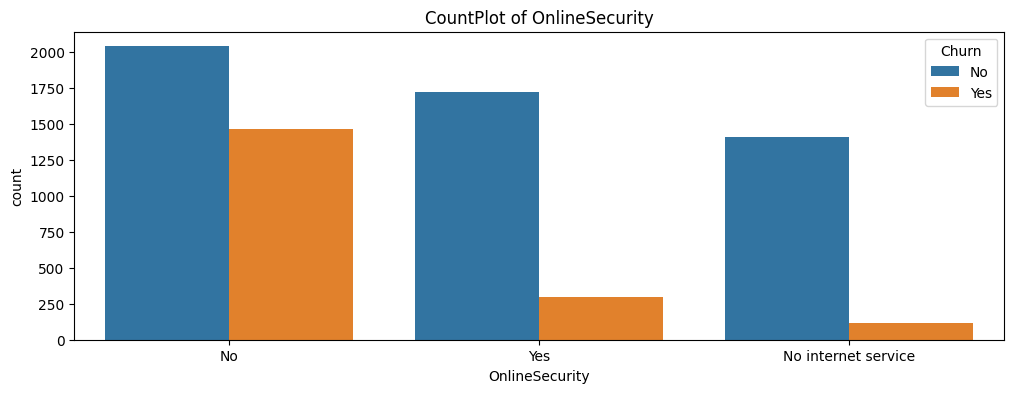

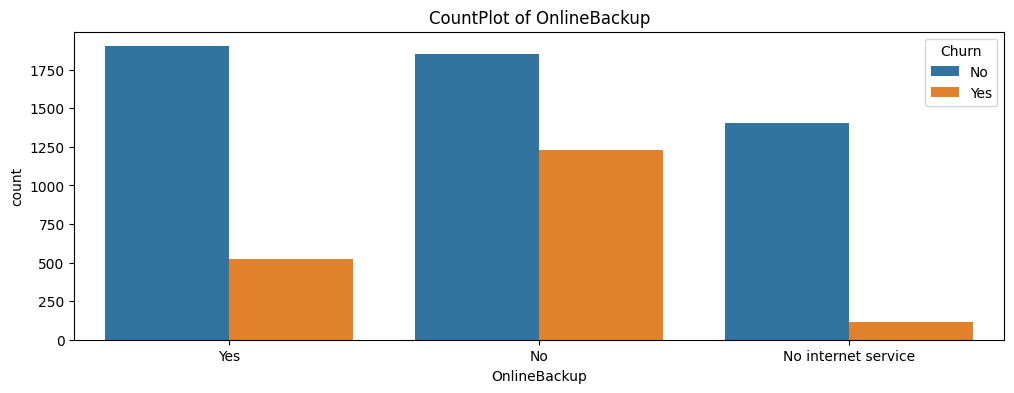

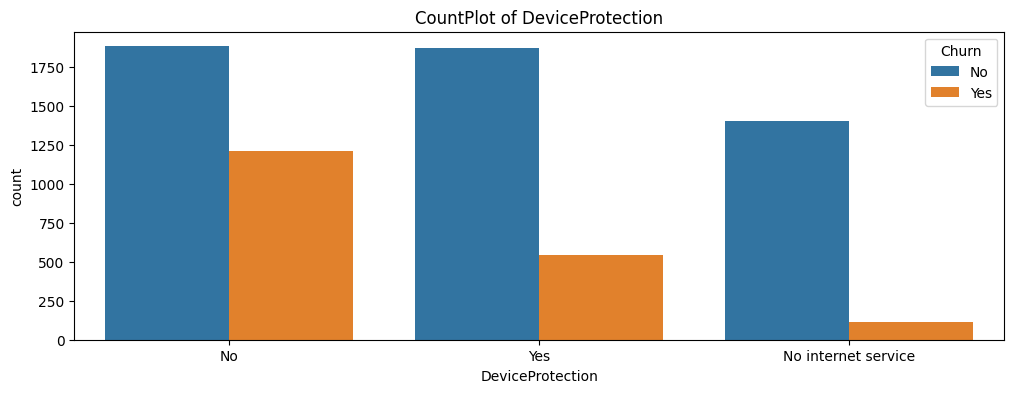

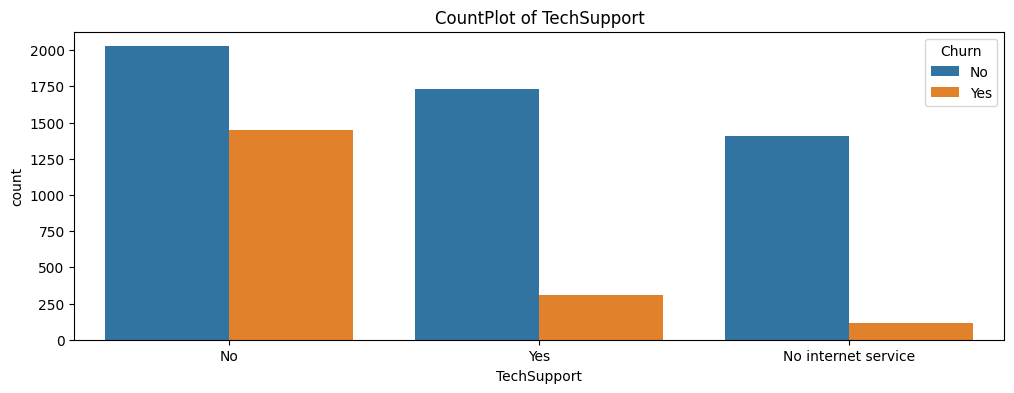

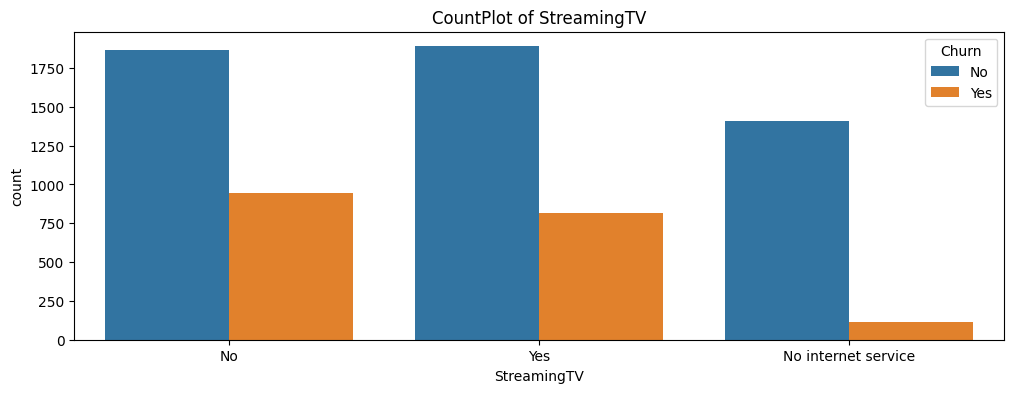

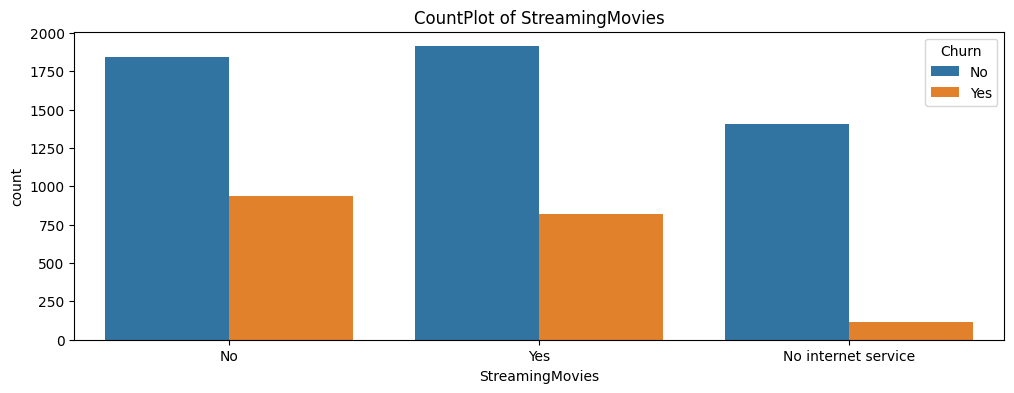

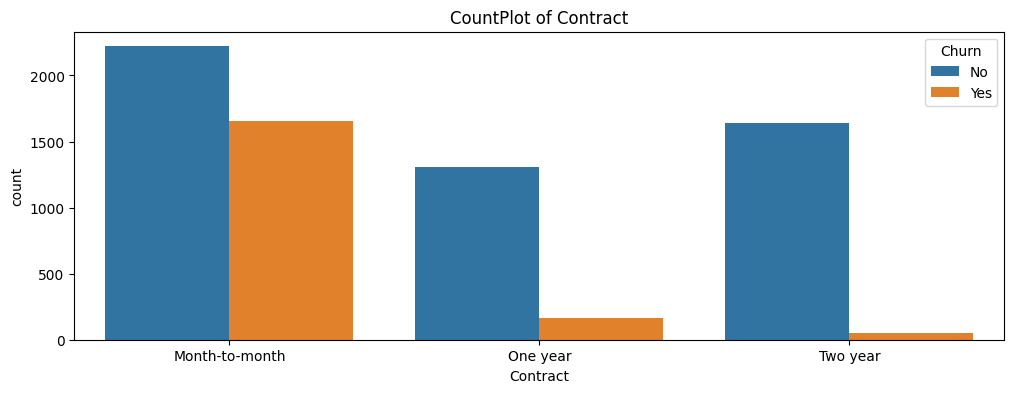

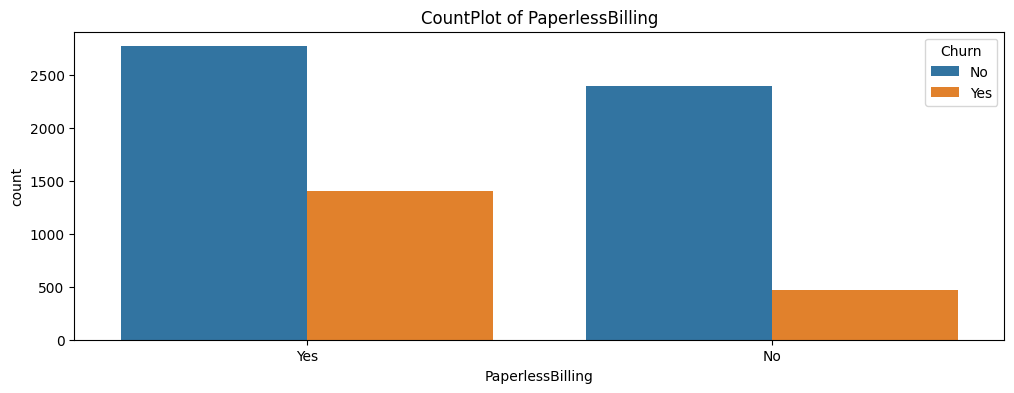

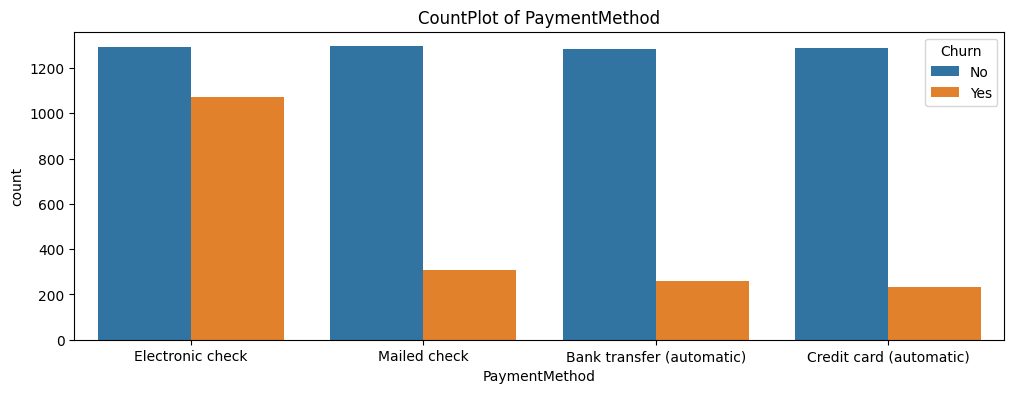

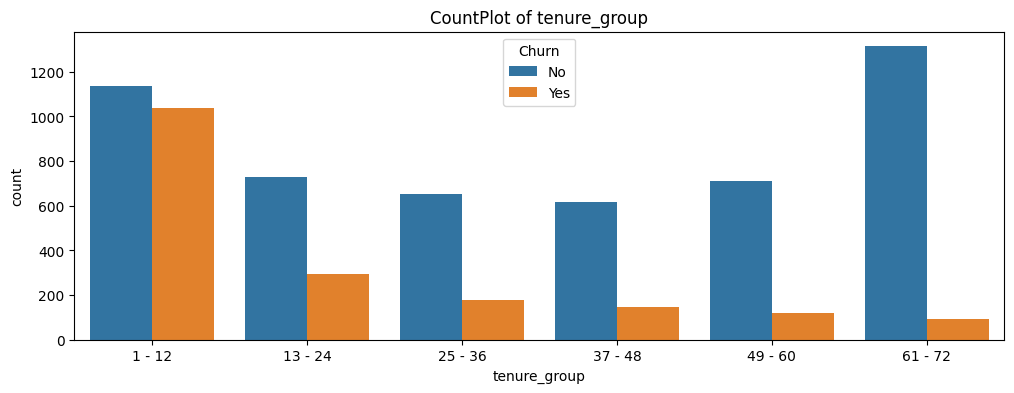

In [211]:
independent_variables = df.drop(columns = ['Churn' , 'MonthlyCharges' , 'TotalCharges'])
for i in independent_variables:
    plt.figure( figsize = (12,4))
    plt.title('CountPlot of '  + i)
    sns.countplot(data = df , x = i , hue = 'Churn' )
    plt.show()

2. Convert target variable 'Churn' to binary .

In [212]:
from sklearn.preprocessing import LabelEncoder

df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

3. Convert all categorical variables into dummy variables.

In [213]:
df_dummies = pd.get_dummies(df)
df_dummies.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


4. Relationship between monthly charges & total charges

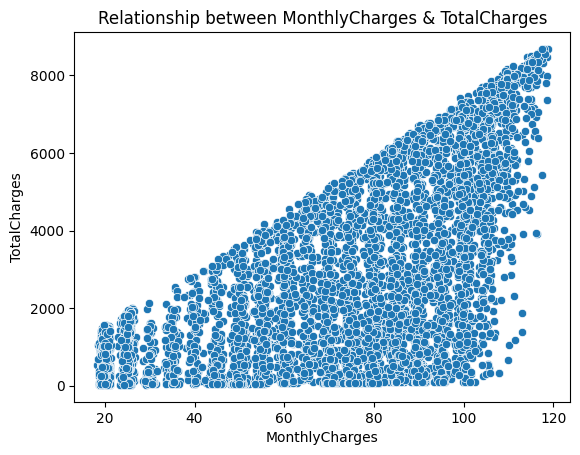

In [214]:
sns.scatterplot( x = 'MonthlyCharges' , y= 'TotalCharges' , data = df_dummies)
plt.title('Relationship between MonthlyCharges & TotalCharges')
plt.show()

As expected total charges increases as monthly charges increases .

5. Churn by Monthly charges & total charges.

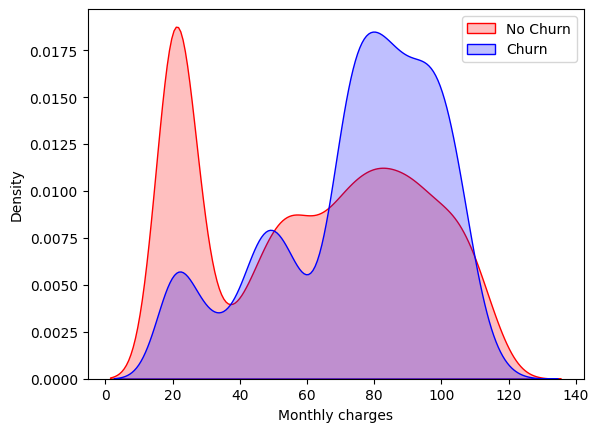

In [215]:
x = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn'] == 0)] , color = 'red' , fill = True)
x = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn'] == 1)], ax = x , color = 'blue' , fill = True)

x.legend(["No Churn" , "Churn"] , loc = 'upper right')
x.set_xlabel('Monthly charges')
x.set_ylabel('Density')
plt.show()

Churn is high when monthly charges are high.

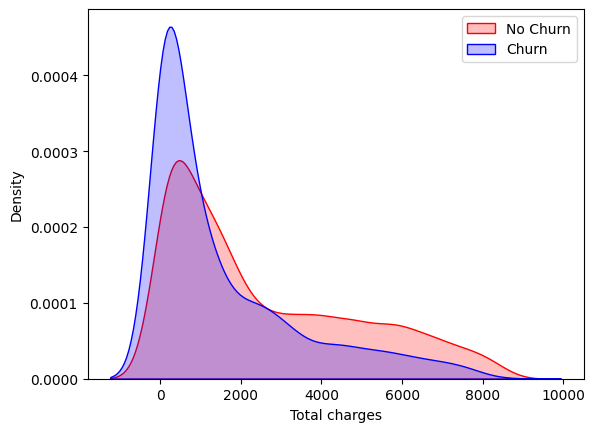

In [216]:
x = sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn'] == 0)] , color = 'red' , fill = True)
x = sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn'] == 1)], ax = x , color = 'blue' , fill = True)

x.legend(["No Churn" , "Churn"] , loc = 'upper right')
x.set_xlabel('Total charges')
x.set_ylabel('Density')
plt.show()

Surprisingly churn is more at less total charges

But if we combine Tenure , Monthly charges , total charges then the picture is bit clear : 
    
    Higher monthly charge at lower tenure results in lower total charge 
    
Thats why all 3 factors - Tenure , Monthly charges , total charges are all combined linked to high churn

6. Build a correlation for all predictors with 'Churn'

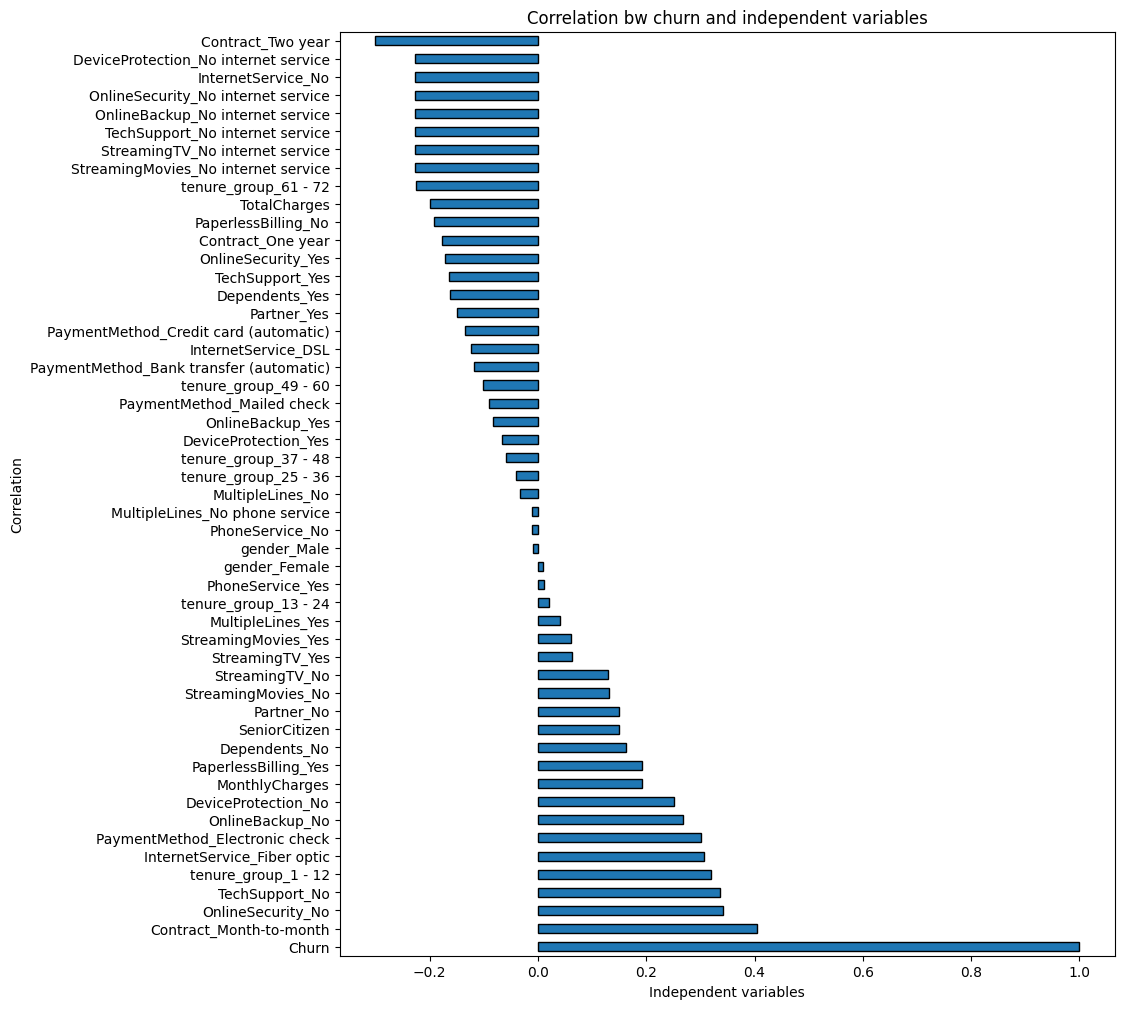

In [217]:
plt.figure(figsize = (10 ,12))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'barh' , edgecolor = 'black')
plt.title("Correlation bw churn and independent variables")
plt.xlabel("Independent variables")
plt.ylabel('Correlation')
plt.show()

High churn is seen in month - month contract , No online security , no tech support , tenure group(1-12) & internet service - fiber optic .

Low churn is seen in Long term contracts , subscription without internet service & customers engaged for 5+ years .

Factors like gender , availability of phone services & multiples lines have NO impact on churn .

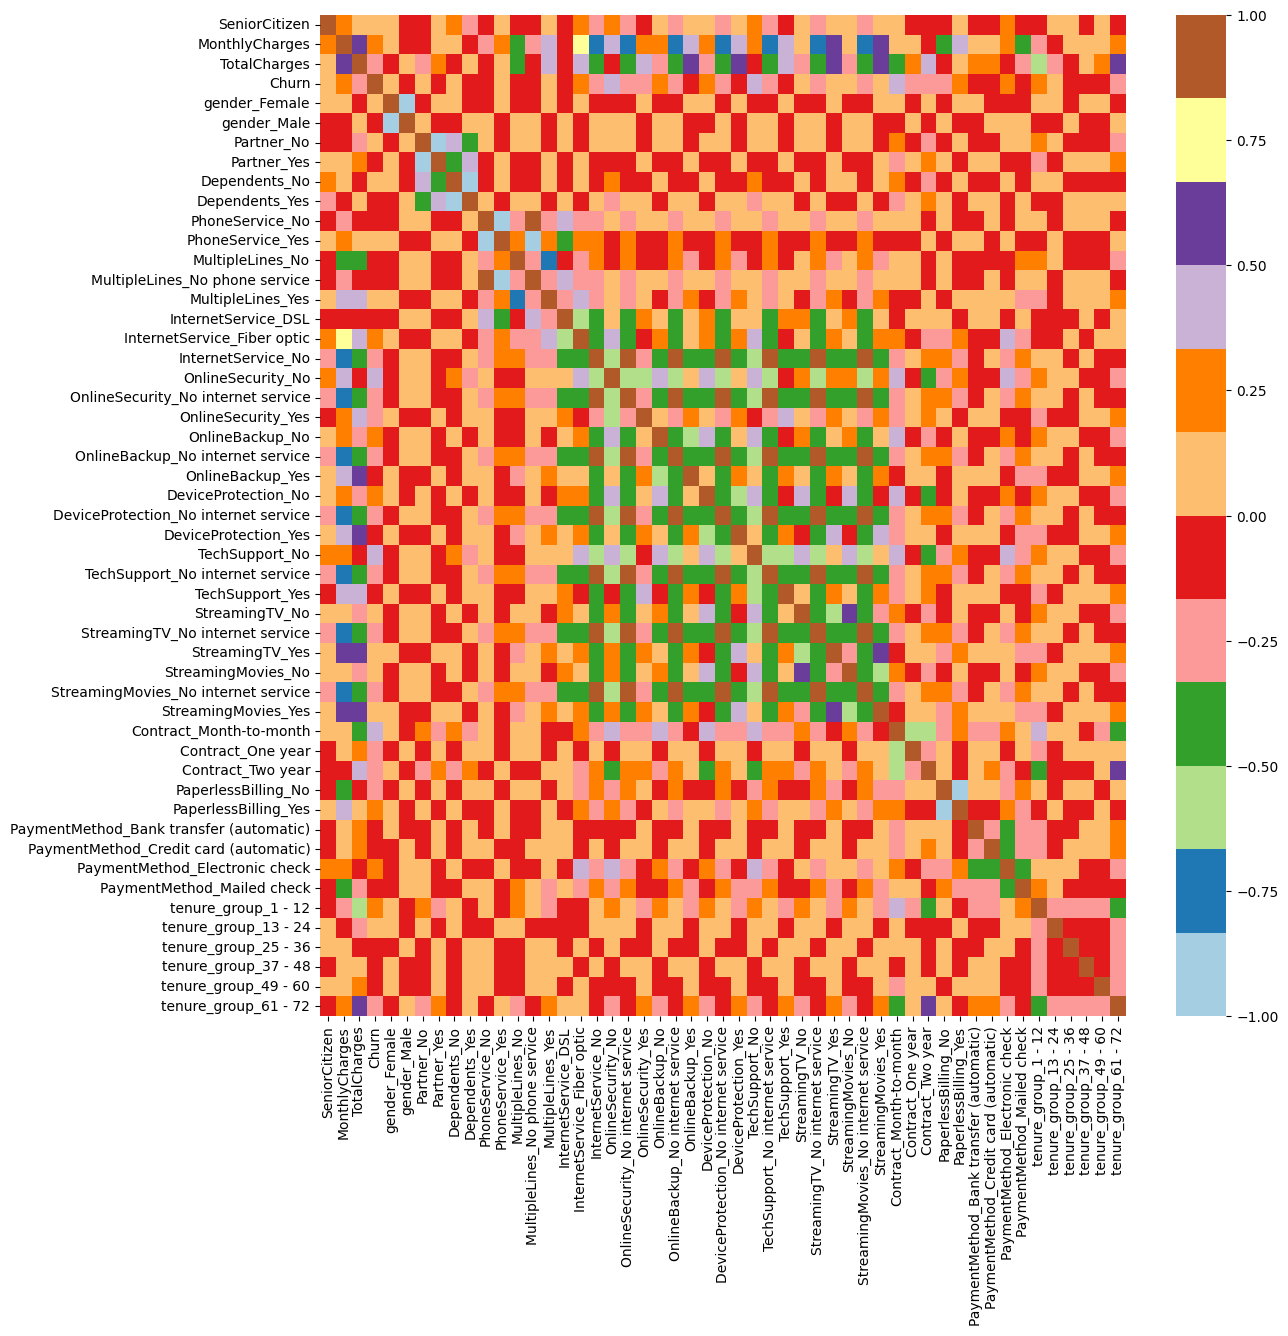

In [218]:
plt.figure(figsize = (13,13))
sns.heatmap(df_dummies.corr() , cmap = "Paired")
plt.show()

BIVARIATE ANALYSIS

In [219]:
#Seperating the data to churned and not churned customers 

target0 = df.loc[df['Churn'] == 0]
target1 = df.loc[df['Churn'] == 1]

In [220]:
def bivariate(df , var1 , var2):
    
    plt.figure(figsize = (10 , 6))
    sns.countplot( x = var1 , hue = var2 , data = df)

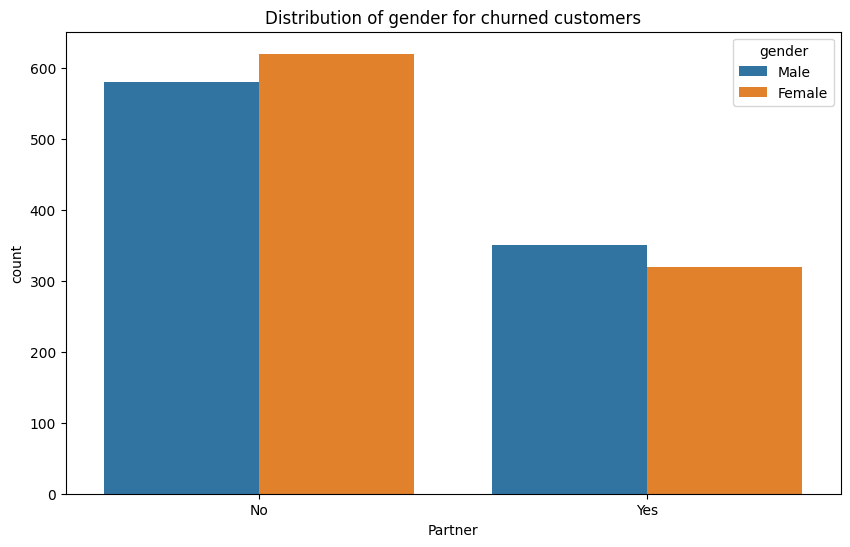

In [221]:
bivariate(target1 ,'Partner', 'gender')
plt.title('Distribution of gender for churned customers')
plt.show()

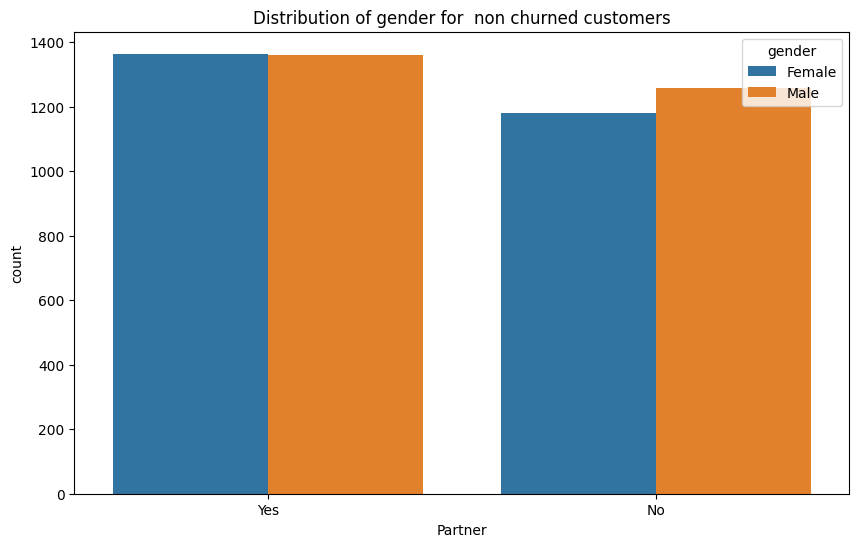

In [222]:
bivariate(target0 ,'Partner', 'gender')
plt.title('Distribution of gender for  non churned customers')
plt.show()

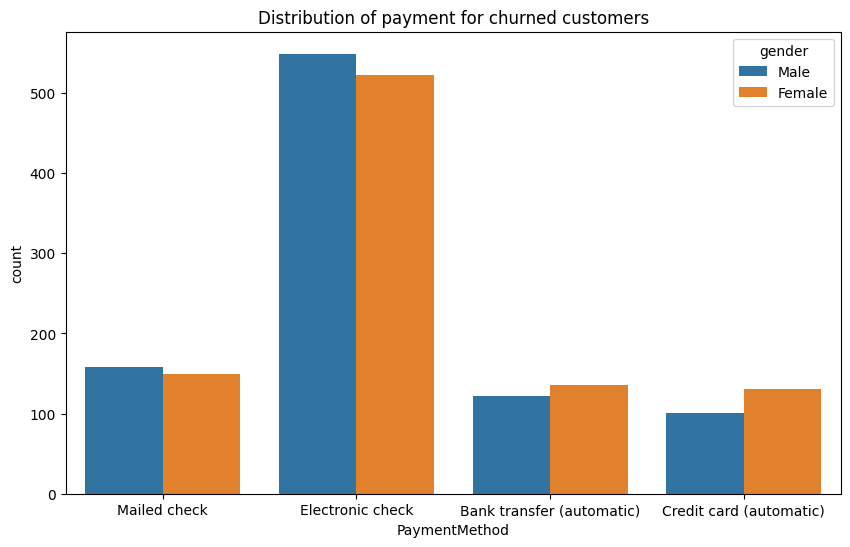

In [223]:
bivariate(target1 ,'PaymentMethod', 'gender')
plt.title('Distribution of payment for churned customers')
plt.show()

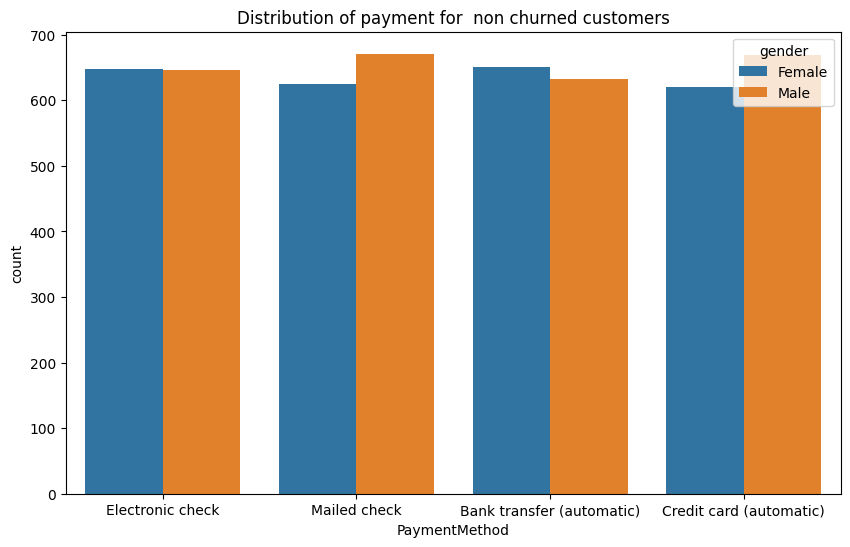

In [224]:
bivariate(target0 ,'PaymentMethod', 'gender')
plt.title('Distribution of payment for  non churned customers')
plt.show()

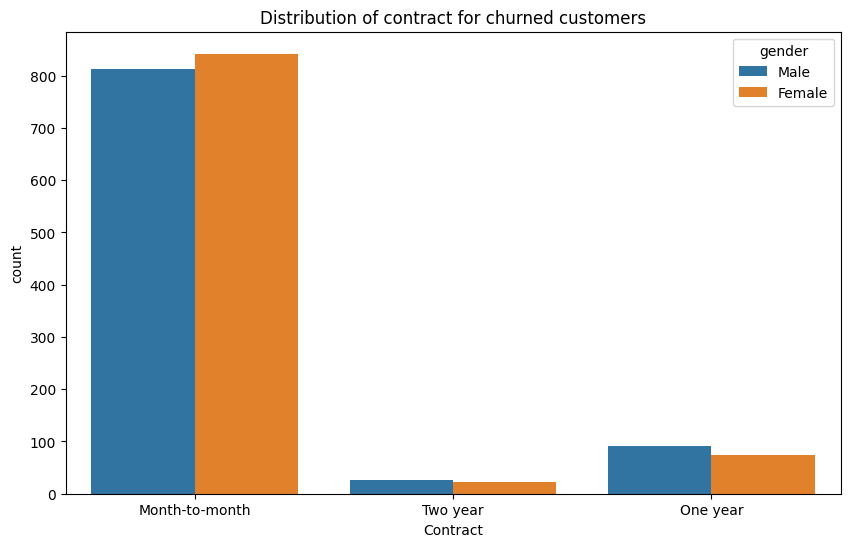

In [225]:
bivariate(target1 ,'Contract', 'gender')
plt.title('Distribution of contract for churned customers')
plt.show()

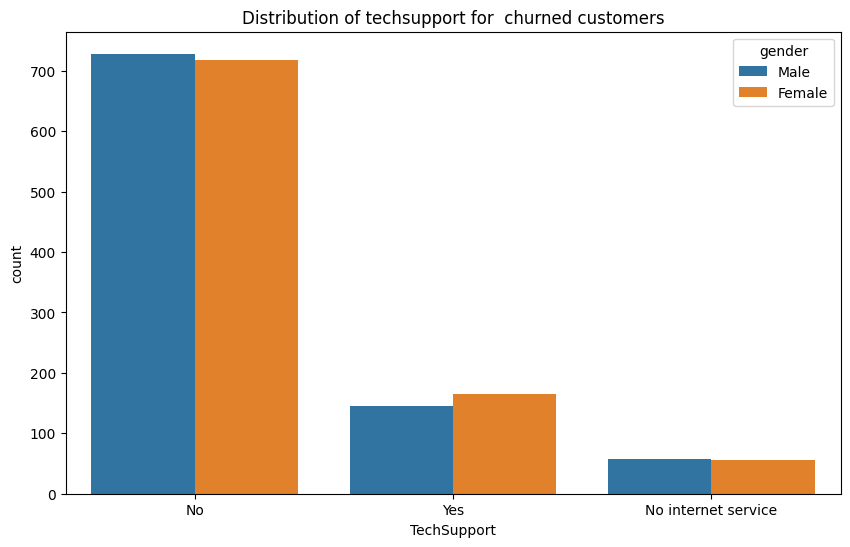

In [226]:
bivariate(target1 ,'TechSupport', 'gender')
plt.title('Distribution of techsupport for  churned customers')
plt.show()

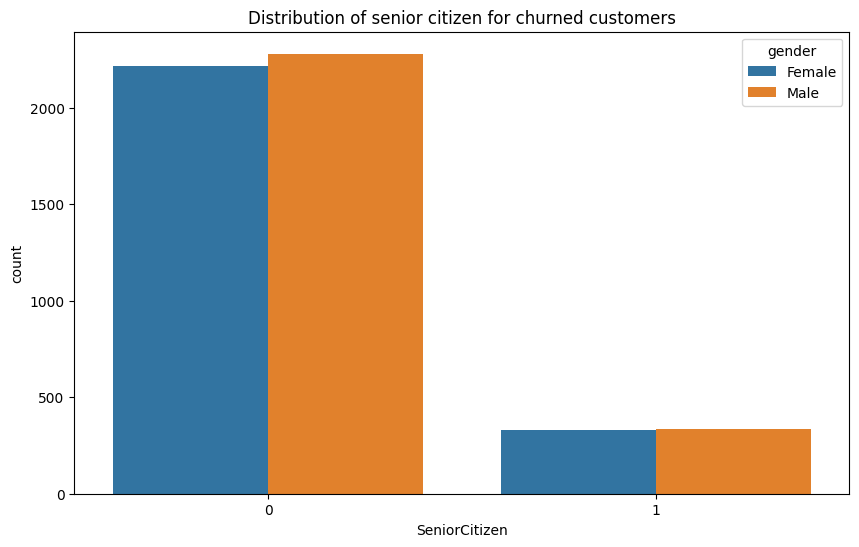

In [227]:
bivariate(target0 ,'SeniorCitizen', 'gender')
plt.title('Distribution of senior citizen for churned customers')
plt.show()

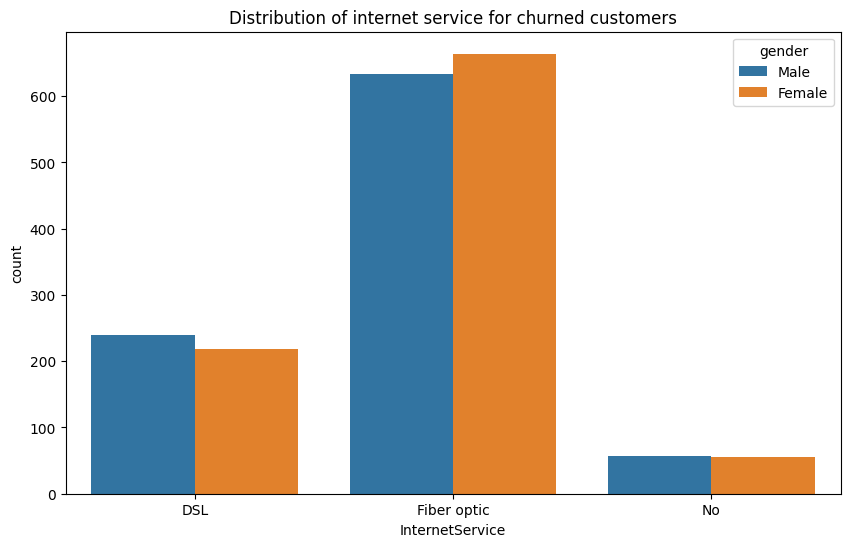

In [228]:
bivariate(target1 ,'InternetService', 'gender')
plt.title('Distribution of internet service for churned customers')
plt.show()

                                                            CONCLUSION

1. Non senior citizen are the high churners 

2. No online security , no techsupport are high churning factors

3. Contract type - Monthly customers are high churners because they dont have any binding contract . they are free to go .

4. Payment method - Electronic check are the highest churners . 

In [229]:
df_dummies.to_csv("df_churn.csv")